<h1 style="text-align: center;">Discrete Convolution</h1>
<p style="text-align: center;">Lab 3</p>
<p style="text-align: center;">Spring 2024</p>

### 1. Purpose 
Become familiar with convolution and its properties using Python.

### 2. Deliverables Overview 
##### Part 1
[ ] Code for **Task 1**.  
[ ] Plots for **Task 2**.  
  
##### Part 2
[ ] Code for **Task 1**.  
[ ] Plots for **Task 2**, **Task 3**, and **Task 4**.  
[ ] Code and plots for **Task 5**.

### 3. Part 1
##### 3.1 Purpose
Use the step and ramp functions developed in **Lab 2** to write functions to use in the rest of this lab.
##### 3.2 Tasks
1. Create the following signals with user-defined functions.  
$$f_1(t) = u(t - 2) - u(t - 9)$$  
$$f_2(t) = e^{-t}u(t)$$  
$$f_3(t) = r(t - 2)[u(t - 2) - u(t - 3)] + r(4 - t)[u(t - 3) - u(t - 4)]$$

In [13]:
# Include all necessary imports here
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [14]:
# Insert code for functions f1, f2, and f3 here. Remember to include descriptions of each funtion including inputs and outputs
def step(t):
    """
    Creates a step function for duration t
    (taken from lab 2)
    """
    return np.array([1 if t[i] >= 0 else 0 for i in range(len(t))])

def ramp(t):
    """
    Creates a ramp function for duration t
    (taken from lab 2)
    """
    return np.array([t[i] if t[i] >= 0 else 0 for i in range(len(t))])

def f1(t):
    """
    returns the function f(t) = u(t-2) - u(t-9)
    """
    return (step(t-2) - step(t-9))

def f2(t):
    """
    returns the function f(t) = (e^-t)u(t)
    """
    return (np.exp(-t)*step(t))

def f3(t):
    """
    returns the function f(t) = r(t-2) [u(t-2) - u(t-3)] + r(4-t) [u(t-3) - u(t-4)]
    """
    return (ramp(t-2)*(step(t-2)-step(t-3)) + ramp(4-t)*(step(t-3)-step(t-4)))

2. Plot the three functions in a single figure, seperate subplots, from $0 \le t \le 20$ s with time steps small enough to achieve appropriate resolution.

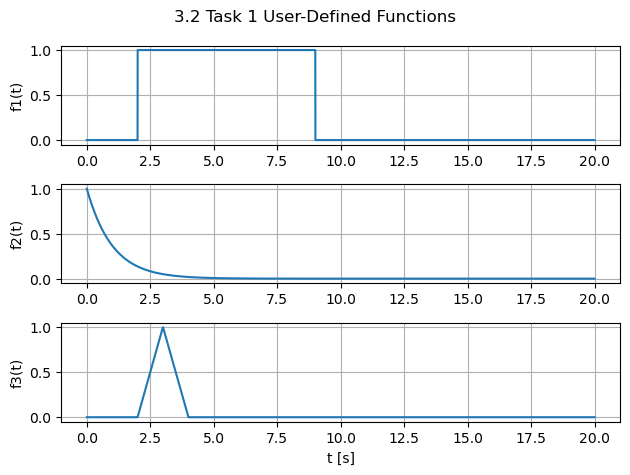

In [30]:
# Insert code to call each function and plot them all in one figure, three subplots, here
stepsize = 0.001
t = np.arange(0, 20+stepsize, stepsize)
y = f1(t)

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(t, y, label = "f1(t)")
plt.grid()
plt.ylabel("f1(t)")
plt.suptitle("3.2 Task 1 User-Defined Functions")

t = np.linspace(0, 20, 1000)
y = f2(t)

plt.subplot(3, 1, 2)
plt.plot(t, y, label = "f2(t)")
plt.grid()
plt.ylabel("f2(t)")

t = np.linspace(0, 20, 1000)
y = f3(t)

plt.subplot(3, 1, 3)
plt.plot(t, y, label = "f3(t)")
plt.grid()
plt.ylabel("f3(t)")
plt.xlabel("t [s]")
plt.tight_layout()
plt.show()

### 4. Part 2
##### 4.1 Purpose
Create code to perform the convolution of two functions. Verify this code with Python's built-in convolution tools.
##### 4.2 Tasks
1. Write your own code to perform convolution. Describe the functionality of your code thoroughly in the function description and using comments where appropriate. *Note: Recall that the duration of a convolution is the sum of the duration of each function convolved. Adjust your plot window sizes and time vectors appropriately. Hint: You will not have to use the numpy integrate function, think back to how you first learned integrals.

In [77]:
# # Insert code for your convolution function here
def convolveME(f1, f2):
    nf1 = len(f1)
    nf2 = len(f2)
    f1extended = np.append(f1, np.zeros((1, nf2-1)))
    f2extended = np.append(f2, np.zeros((1, nf1-1)))
    result = np.zeros(f1extended.shape)

    for i in range(nf2+nf1-2):
        result[i] = 0 #thinks is redundant
        for j in range(nf1):
            # don't need try and except, just debugging tool
            try:
                result[i] += f1extended[j]*f2extended[i-j+1]
            except:
                print(i,j)
    return result

2. Plot the convolution of $f_1$ and $f_2$.

Text(0.5, 0.98, '4.2 Task 2 Convolving f1(t) & f2(t)')

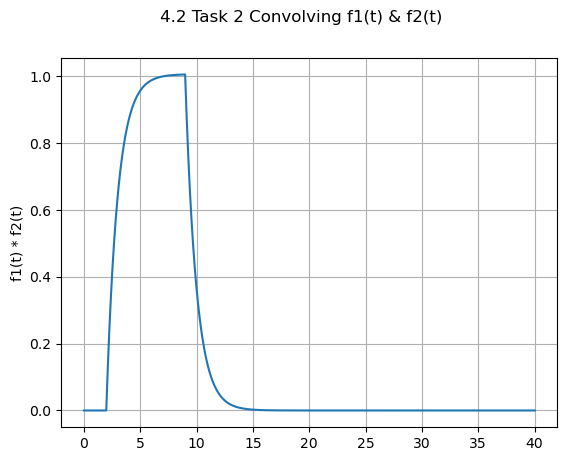

In [78]:
# Insert code to plot the appropriate convolution here
stepsize = 1e-2
t = np.arange(0,20+stepsize, stepsize)
tLonger = np.arange(0,2*t[len(t)-1], stepsize)
y = convolveME(f1(t), f2(t))*stepsize

plt.figure()
# plt.subplot(1, 1, 1)
plt.plot(tLonger, y)
plt.grid()
plt.ylabel("f1(t) * f2(t)")
plt.suptitle("4.2 Task 2 Convolving f1(t) & f2(t)")

3. Plot the convolution of $f_2$ and $f_3$.

Text(0.5, 0.98, '4.2 Task 2 Convolving f2(t) & f3(t)')

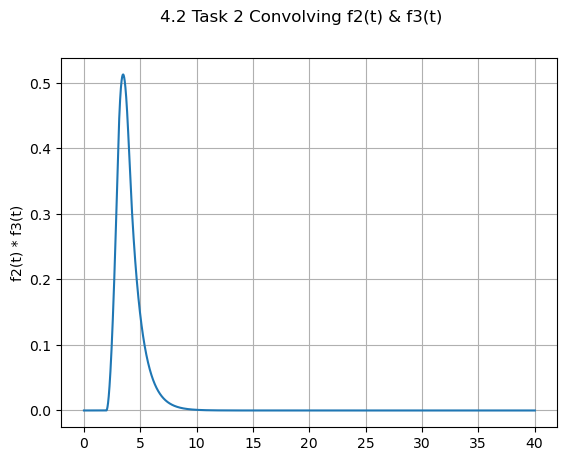

In [79]:
# Insert code to plot the appropriate convolution here
stepsize = 1e-2
t = np.arange(0,20+stepsize, stepsize)
tLonger = np.arange(0,2*t[len(t)-1], stepsize)
y = convolveME(f2(t), f3(t))*stepsize

plt.figure()
# plt.subplot(1, 1, 1)
plt.plot(tLonger, y)
plt.grid()
plt.ylabel("f2(t) * f3(t)")
plt.suptitle("4.2 Task 2 Convolving f2(t) & f3(t)")

4. Plot the convolution of $f_1$ and $f_3$.

Text(0.5, 0.98, '4.2 Task 2 Convolving f1(t) & f3(t)')

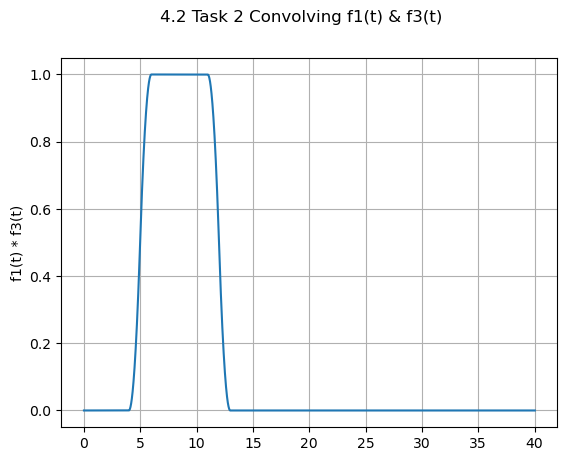

In [80]:
# Insert code to plot the appropriate convolution here
stepsize = 1e-2
t = np.arange(0,20+stepsize, stepsize)
tLonger = np.arange(0,2*t[len(t)-1], stepsize)
y = convolveME(f1(t), f3(t))*stepsize

plt.figure()
# plt.subplot(1, 1, 1)
plt.plot(tLonger, y)
plt.grid()
plt.ylabel("f1(t) * f3(t)")
plt.suptitle("4.2 Task 2 Convolving f1(t) & f3(t)")

5. Verify your convolution function is working correctly using the **scipy.signal.convolve()** function by plotting the convolutions from **Task 2**, **Task 3**, and **Task 4** in one figure with three subplots.

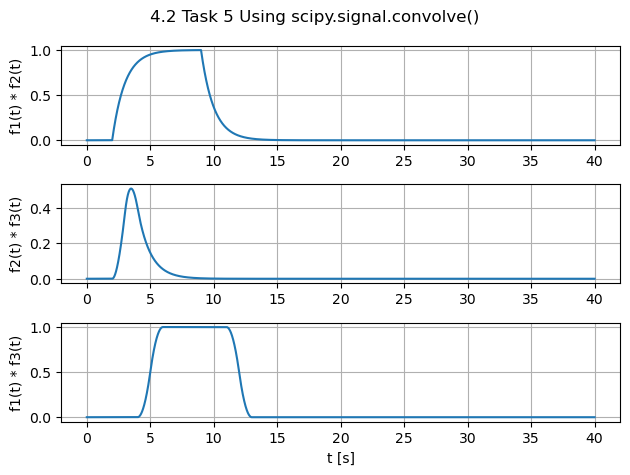

In [61]:
# Insert code using sig.convolve() to plot the convolutions from task 2, 3, and 4 in one figure with three subplots here.
stepsize = 0.001
t = np.arange(0,20+stepsize, stepsize)
r = np.arange(0,40+stepsize, stepsize)
y = sig.convolve(f1(t), f2(t), mode = 'full', method = 'direct')*stepsize

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(r, y)
plt.grid()
plt.ylabel("f1(t) * f2(t)")
plt.suptitle("4.2 Task 5 Using scipy.signal.convolve()")

r = np.arange(0,40+stepsize, stepsize)
y = sig.convolve(f2(t), f3(t), mode = 'full', method = 'direct')*stepsize

plt.subplot(3, 1, 2)
plt.plot(r, y)
plt.grid()
plt.ylabel("f2(t) * f3(t)")

r = np.arange(0,40+stepsize, stepsize)
y = sig.convolve(f1(t), f3(t), mode = 'full', method = 'direct')*stepsize

plt.subplot(3, 1, 3)
plt.plot(r, y)
plt.grid()
plt.ylabel("f1(t) * f3(t)")
plt.xlabel("t [s]")
plt.tight_layout()
plt.show()

### 5. Questions
1. Did you work alone or with classmates on this lab? If you collaborated to get to the solution, what did that process look like?    
>I worked on my own for the first part since it was largely from the previous lab. I attempted to work with a classmate on creating the convolution function. It started with an idea from me and her giving some feedback and confirming that she also thought it would work. We then ping-ponged ideas of how the code might look and work and attempted to figure out the code somewhat on our own, but checking in at points.    
2. What was the most difficult part of this lab for you, and what did your problem-solving process look like? 
>The hardest part of this lab for me was wrapping my head around how to "reverse" a function. I found on Google that you can use "list(reversed(list_name)) to reverse a list, but that didn't work as intended. My problem-solving process started with Googling how I can reverse a list. Then, I reasoned through how a convolution would work. This translated into the two for loops. I then started thinking about how I would have to go through the arrays to achieve the process of the convolution. (This did not work because the reversed list doesn't work with these). I would have started debugging, but at that time, Phillip gave us his function. Which is when I realized that I was close, but I thought about the indexing during the for loops wrong.
3. Did you approach writing the code with analytical or graphical convolution in mind? Why did you chose this approach?
>I feel like I approached the code with the graphical convolution in mind. I personally am more confused with analytical convolution than graphical convolution. Also, I really like to visualize what I'm working with and almost drew a picture on a scrap sheet of paper. 
4. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>I thought this lab was laid out well! I have no critiques.